In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pathgradient import *
rng = np.random.default_rng()

import jaxopt
from jax import random

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve
from scipy.stats import gaussian_kde

## Sample two energies the "traditional" way

fsolve 0.8700428009033203 seconds
fsolve 0.67464280128479 seconds


<Figure size 640x480 with 0 Axes>

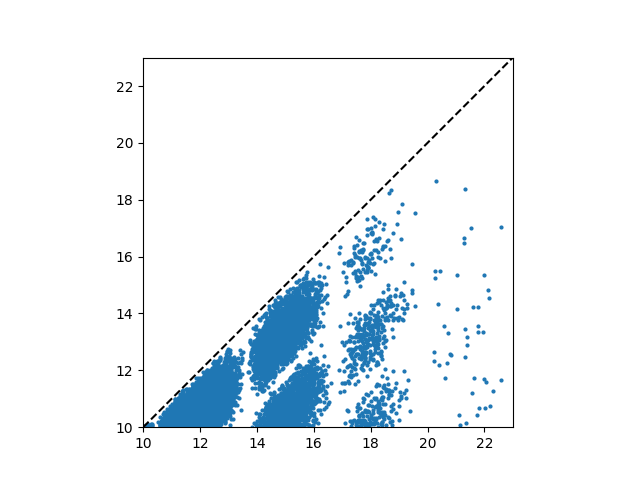

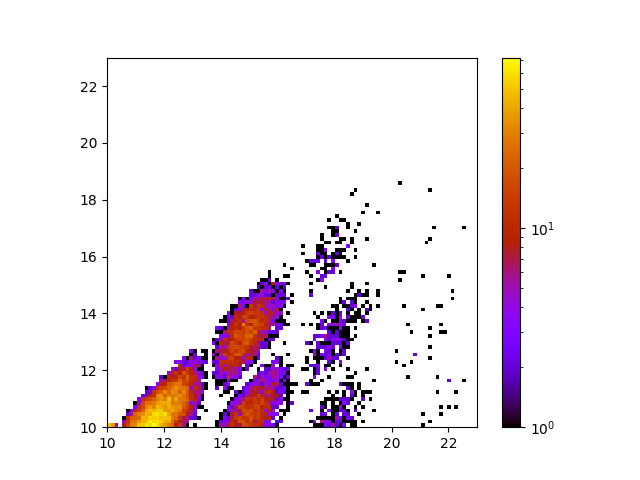

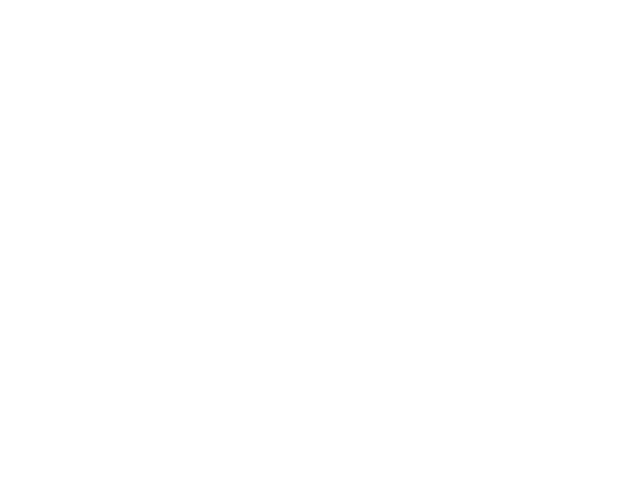

In [31]:
%matplotlib widget
# Sample two energies using the "traditional" way
sample_num = 10000
passes = 1

initial_energy = np.ones(sample_num) * 23.0
discrete_energies = DISCRETE_ENERGIES
discrete_continuum_boundary = DISCRETE_CONTINUUM_BOUNDARY
disp_parameter = 0.01

next_energies_1 = []
next_energies_2 = []

for i in range(passes):
    rs1 = rng.random(sample_num)
    rs2 = rng.random(sample_num)


    next_energy_1, continuum_cut_1 = spicy_inverse_cdf_differential_decay_width(
                                                        rs1, initial_energy, discrete_energies,
                                                        discrete_continuum_boundary,
                                                        disp_parameter, False,
                                                        verbose=1)

    next_energy_2, continuum_cut_2 = spicy_inverse_cdf_differential_decay_width(
                                                        rs2, next_energy_1, discrete_energies,
                                                        discrete_continuum_boundary,
                                                        disp_parameter, use_continuum_cut=False,
                                                        verbose=1)

    next_energies_1.append(next_energy_1)
    next_energies_2.append(next_energy_2)

next_energies_1 = np.concatenate(next_energies_1)
next_energies_2 = np.concatenate(next_energies_2)

# # print(rs1)
# # print(rs2)
# # print(next_energy_1)
# # print(next_energy_2)

# Plot
plt.figure()
plt.scatter(next_energy_1, next_energy_2, s=4)
# Plot the x=y line
plt.plot([discrete_continuum_boundary, 23], [discrete_continuum_boundary, 23], color='black', linestyle='--')
# Set the axis limits
plt.xlim([discrete_continuum_boundary, 23])
plt.ylim([discrete_continuum_boundary, 23])
# Set aspect ratio to 1
plt.gca().set_aspect('equal', adjustable='box')

plt.figure()
# 2D hist with a log cmap
bins_x = np.linspace(discrete_continuum_boundary, 23, 100)
bins_y = np.linspace(discrete_continuum_boundary, 23, 100)
plt.hist2d(next_energy_1, next_energy_2, bins=[bins_x, bins_y], cmap='gnuplot', norm = mpl.colors.LogNorm())
# Set aspect ratio to 1
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()

plt.figure()




## Sample 3 energies the "traditional" way

Pass:  0


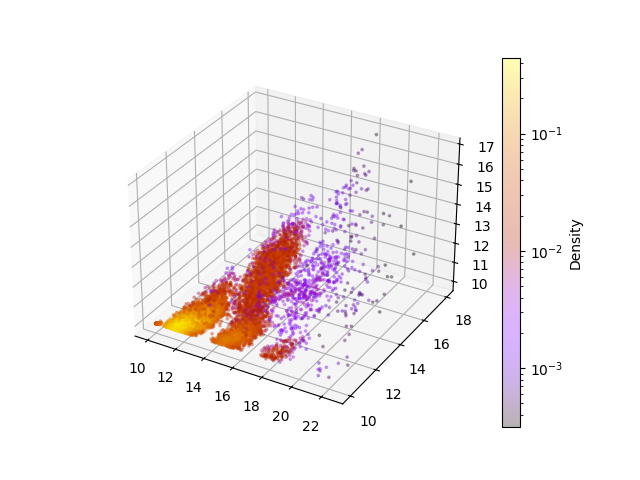

In [29]:
%matplotlib widget
# Sample two energies using the "traditional" way
sample_num = 10000
passes = 1

initial_energy = np.ones(sample_num) * 23.0
discrete_energies = DISCRETE_ENERGIES
discrete_continuum_boundary = DISCRETE_CONTINUUM_BOUNDARY
disp_parameter = 0.01

next_energies_1 = []
next_energies_2 = []
next_energies_3 = []

for i in range(passes):
    print("Pass: ", i)
    rs1 = rng.random(sample_num)
    rs2 = rng.random(sample_num)
    rs3 = rng.random(sample_num)


    next_energy_1, continuum_cut_1 = spicy_inverse_cdf_differential_decay_width(
                                                        rs1, initial_energy, discrete_energies,
                                                        discrete_continuum_boundary,
                                                        disp_parameter, False,
                                                        verbose=0)

    next_energy_2, continuum_cut_2 = spicy_inverse_cdf_differential_decay_width(
                                                        rs2, next_energy_1, discrete_energies,
                                                        discrete_continuum_boundary,
                                                        disp_parameter, use_continuum_cut=False,
                                                        verbose=0)
    
    next_energy_3, continuum_cut_3 = spicy_inverse_cdf_differential_decay_width(
                                                        rs3, next_energy_2, discrete_energies,
                                                        discrete_continuum_boundary,
                                                        disp_parameter, use_continuum_cut=False,
                                                        verbose=0)

    next_energies_1.append(next_energy_1)
    next_energies_2.append(next_energy_2)
    next_energies_3.append(next_energy_3)

next_energies_1 = np.concatenate(next_energies_1)
next_energies_2 = np.concatenate(next_energies_2)
next_energies_3 = np.concatenate(next_energies_3)

# # print(rs1)
# # print(rs2)
# # print(next_energy_1)
# # print(next_energy_2)

data = np.vstack([next_energies_1, next_energies_2, next_energies_3])
kde = gaussian_kde(data)
density = kde(data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with density as color
scatter = ax.scatter(data[0,:], data[1,:], data[2,:], c=density, s=3, cmap='gnuplot', norm=mpl.colors.LogNorm(), alpha=0.3)

# Add a color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Density')

plt.show()

In [4]:
# bisec = jaxopt.Bisection(optimality_fun=bis, lower=-10, upper=10)
# bisec.run(y=5.0)

initial_energy = 23.0
discrete_energies = DISCRETE_ENERGIES
discrete_continuum_boundary = DISCRETE_CONTINUUM_BOUNDARY
disp_parameter = 0.01
cdf_value = 0.9

solver = jaxopt.Bisection(optimality_fun=jax_cdf_minimum, lower=discrete_continuum_boundary, upper=initial_energy, verbose=True)
root = solver.run(None, cdf_value, initial_energy, discrete_energies, discrete_continuum_boundary, disp_parameter)

Solver: Bisection, Error: 0.03368037997550821
Solver: Bisection, Error: 0.351521156153187
Solver: Bisection, Error: 0.19308873845013652
Solver: Bisection, Error: 0.015939551905529536
Solver: Bisection, Error: 0.02327692950164617
Solver: Bisection, Error: 0.00826198801154887
Solver: Bisection, Error: 0.002617857515321842
Solver: Bisection, Error: 0.0031213937361098676
Solver: Bisection, Error: 0.00032755660250149976
Solver: Bisection, Error: 0.0011261022581086078
Solver: Bisection, Error: 0.0003945225658930074
Solver: Bisection, Error: 3.229696441575669e-05
Solver: Bisection, Error: 0.00014792612520020398
Solver: Bisection, Error: 5.7888681908147e-05
Solver: Bisection, Error: 1.2814387229442836e-05
Solver: Bisection, Error: 9.73665608539065e-06


1 12.0 11.0
2 14.933007476390328 13.046692937303197


/Users/pbarham/jax-metal/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


3 11.5233464686516 10.9741175367519
4 10.487058768375949 10.012323028469044
5 12.011323294597256 10.127419633394748
6 14.311498328921928 10.055022896133565
7 12.060080633347042 11.177428051683584
8 15.695860380501701 14.151683309869464
9 12.075841654934731 11.270029194099571
10 10.635014597049786 10.464842168236638
Time taken: 3.4397377967834473


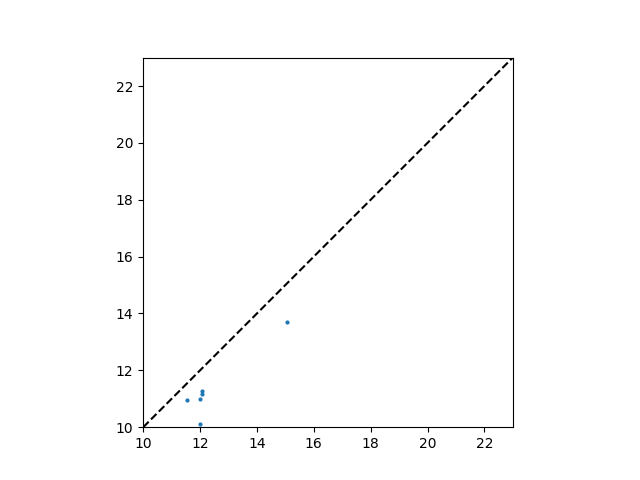

In [ ]:
%matplotlib widget
# Set up out Gibbs sampler (for two energies)
initial_energy = 23.0
discrete_energies = DISCRETE_ENERGIES
discrete_continuum_boundary = DISCRETE_CONTINUUM_BOUNDARY
disp_parameter = 0.01

# Initial state
e1_0, e2_0 = 12.0, 11.0

# Conditional distribution.
# Probability of e1 given e2 is just...

def conditional_distribution_sampler_21(e1, random_num):
    e2 = inverse_cdf_differential_decay_width(random_num, e1, discrete_continuum_boundary, disp_parameter)
    return e2

def conditional_distribution_12_unnormalized_pdf(e1, e2):
    # Per Bayes theorem, the two PDFs we have to multiply are...
    p_e2_given_e1 = differential_decay_width(e2, e1, discrete_continuum_boundary, disp_parameter)
    p_e1 = differential_decay_width(e1, initial_energy, discrete_continuum_boundary, disp_parameter)

    #print(p_e2_given_e1, p_e1, "pdf")

    return p_e2_given_e1 * p_e1

def conditional_distribution_12_cdf(e1, e2):
    energies = np.linspace(discrete_continuum_boundary, e1, 5000)
    full_energies = np.linspace(discrete_continuum_boundary, initial_energy, 5000)

    cdf_val = np.trapz(conditional_distribution_12_unnormalized_pdf(energies, e2), energies, axis=0)
    cdf_norm = np.trapz(conditional_distribution_12_unnormalized_pdf(full_energies, e2), full_energies, axis=0)

    cdf = cdf_val / cdf_norm

    # This is needed because fsolve is fucking retarded
    cdf = np.where(e1 > initial_energy, 1 + e1-initial_energy, cdf)
    cdf = np.where(e1 < discrete_continuum_boundary, e1-discrete_continuum_boundary, cdf)

    return cdf

def conditional_distribution_sampler_12(e2, random_num):
    # Inverse CDF method
    # Find the root of the CDF function
    root = fsolve(lambda x: conditional_distribution_12_cdf(x, e2) - random_num, np.array([(e2 + discrete_continuum_boundary)/2]))
    return root[0]

# Gibbs sampler
def gibbs_sampler(conditional_distribution_sampler_xy, conditional_distribution_sampler_yx,
                   initial_state, num_samples, burn_in, thinning, seed=0):
    # Set seed and random numbers
    np.random.seed(seed)
    r1 = np.random.random(num_samples + burn_in + 1)
    r2 = np.random.random(num_samples + burn_in + 1)

    # Set up arrays
    x = np.zeros(num_samples + burn_in + 1)
    y = np.zeros(num_samples + burn_in + 1)

    # Initialize
    x[0] = initial_state[0]
    y[0] = initial_state[1]

    for i in range(1, num_samples + burn_in + 1):
        print(i, x[i-1], y[i-1])
        # Sample x_i given y_i-1
        x[i] = conditional_distribution_sampler_xy(y[i-1], r1[i])
        # Sample y_i given x_i
        y[i] = conditional_distribution_sampler_yx(x[i], r2[i])
    
    # Return the samples
    return x[burn_in::thinning], y[burn_in::thinning], x, y


# Run the Gibbs sampler
num_samples = 10
burn_in = 0
thinning = 2

start = time.time()
x_samples, y_samples, x, y = gibbs_sampler(conditional_distribution_sampler_12, conditional_distribution_sampler_21,
                                             (e1_0, e2_0), num_samples, burn_in, thinning, seed=0)
end = time.time()
print("Time taken:", end-start)

plt.figure()
plt.scatter(x_samples, y_samples, s=4)
# Plot the x=y line
plt.plot([discrete_continuum_boundary, 23], [discrete_continuum_boundary, 23], color='black', linestyle='--')
# Set the axis limits
plt.xlim([discrete_continuum_boundary, 23])
plt.ylim([discrete_continuum_boundary, 23])
# Set aspect ratio to 1
plt.gca().set_aspect('equal', adjustable='box')


## Gibbs sampler in JAX

INITIAL 12.0 11.0
12.0 11.0
100 15.963695526123047 13.962177276611328
200 14.555234909057617 10.420937538146973
300 11.583457946777344 10.334590911865234
400 14.77771282196045 12.690052032470703
500 17.54714012145996 15.739007949829102
600 11.89846420288086 10.17719841003418
700 11.797430038452148 10.149776458740234
800 15.462718963623047 11.72727108001709
900 12.488473892211914 10.321577072143555
1000 12.021329879760742 10.070167541503906
Time taken: 29.388275861740112


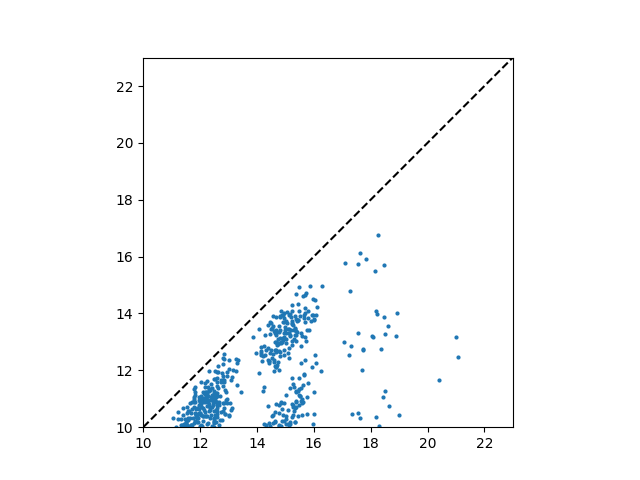

In [7]:
# Gibbs sampler in JAX
%matplotlib widget
# Set up out Gibbs sampler (for two energies)
initial_energy = 23.0
discrete_energies = DISCRETE_ENERGIES
discrete_continuum_boundary = DISCRETE_CONTINUUM_BOUNDARY
disp_parameter = 0.01

# Initial state
e1_0, e2_0 = 12.0, 11.0

# Conditional distribution.
# Probability of e1 given e2 is just...

conditional_distribution_sampler_21 = fast_cdf_inverter_jit

def conditional_distribution_12_unnormalized_pdf(e1, e2, initial_energy, discrete_continuum_boundary, disp_parameter):
    # Per Bayes theorem, the two PDFs we have to multiply are...
    p_e2_given_e1 = differential_decay_width(e2, e1, discrete_continuum_boundary, disp_parameter)
    p_e1 = differential_decay_width(e1, initial_energy, discrete_continuum_boundary, disp_parameter)

    #print(p_e2_given_e1, p_e1, "pdf")

    return p_e2_given_e1 * p_e1


def conditional_distribution_12_cdf(e1, e2, initial_energy, discrete_energies, discrete_continuum_boundary, disp_parameter):
    energies = jnp.linspace(discrete_continuum_boundary, e1, 5000)
    full_energies = jnp.linspace(discrete_continuum_boundary, initial_energy, 5000)

    cdf_val = jnp.trapz(conditional_distribution_12_unnormalized_pdf(energies, e2, initial_energy, discrete_continuum_boundary, disp_parameter), energies, axis=0)
    cdf_norm = jnp.trapz(conditional_distribution_12_unnormalized_pdf(full_energies, e2, initial_energy, discrete_continuum_boundary, disp_parameter), full_energies, axis=0)

    cdf = cdf_val / cdf_norm

    # This is needed because fsolve is fucking retarded
    cdf = jnp.where(e1 > initial_energy, 1 + e1-initial_energy, cdf)
    cdf = jnp.where(e1 < discrete_continuum_boundary, e1-discrete_continuum_boundary, cdf)

    return cdf


def root_conditional_distribution_12_cdf(e1, cdf_val, e2, initial_energy, discrete_energies, discrete_continuum_boundary, disp_parameter):
    return conditional_distribution_12_cdf(e1,e2, initial_energy, discrete_energies, discrete_continuum_boundary, disp_parameter) - cdf_val


@jit
def conditional_distribution_sampler_12(cdf_value, e2, initial_energy, discrete_energies, discrete_continuum_boundary, disp_parameter):
    fun = root_conditional_distribution_12_cdf

    #x0 = jnp.array([0.5 * (initial_energy + discrete_continuum_boundary)])
    e1_0 = 0.5 * (e2 + initial_energy)

    solver = jaxopt.Bisection(optimality_fun=fun, lower=e2, upper=initial_energy, jit=True, check_bracket=False)
    root = solver.run(e1_0, cdf_value, e2, initial_energy, discrete_energies, discrete_continuum_boundary, disp_parameter)

    # solver = jaxopt.ScipyRootFinding(optimality_fun=fun, method='hybr', jit=True)
    # root = solver.run(x0, cdf_value, initial_energy, discrete_energies, discrete_continuum_boundary, disp_parameter)

    #return root.params, root.state
    return root.params


# Gibbs sampler
#@partial(jit, static_argnums=(0, 1, 3, 4, 5))
def gibbs_sampler(conditional_distribution_sampler_xy, conditional_distribution_sampler_yx,
                   initial_state, num_samples, burn_in, thinning, initial_energy, arguments, jax_random_key):
    # Set random numbers
    r1 = random.uniform(jax_random_key, (num_samples + burn_in + 1,))
    jax_random_key, jax_random_subkey = random.split(jax_random_key)
    r2 = random.uniform(jax_random_subkey, (num_samples + burn_in + 1,))

    # Set up arrays
    x = np.zeros(num_samples + burn_in + 1)
    y = np.zeros(num_samples + burn_in + 1)

    # Initialize
    # x = x.at[0].set(initial_state[0])
    # y = y.at[0].set(initial_state[1])
    x[0] = initial_state[0]
    y[0] = initial_state[1]
    print("INITIAL", x[0], y[0])
    print(initial_state[0], initial_state[1])

    for i in range(1, num_samples + burn_in + 1):
        # Sample x_i given y_i-1
        #x = x.at[i].set(conditional_distribution_sampler_xy(r1[i], y[i-1], initial_energy, *arguments))
        x[i] = conditional_distribution_sampler_xy(r1[i], y[i-1], initial_energy, *arguments)
        # Sample y_i given x_i
        #y = y.at[i].set(conditional_distribution_sampler_yx(r2[i], x[i], *arguments))
        y[i] = conditional_distribution_sampler_yx(r2[i], x[i], *arguments)

        if i % 100 == 0:
            print(i, x[i], y[i])
    
    # Return the samples
    return x[burn_in::thinning], y[burn_in::thinning], x, y


# Run the Gibbs sampler
num_samples = 1000
burn_in = 0
thinning = 2
jax_random_key = random.PRNGKey(0)
jax_random_key, jax_random_subkey = random.split(jax_random_key)

start = time.time()
arguments = [discrete_energies, discrete_continuum_boundary, disp_parameter]
x_samples, y_samples, x, y = gibbs_sampler(conditional_distribution_sampler_12, conditional_distribution_sampler_21,
                                             (e1_0, e2_0), num_samples, burn_in, thinning, initial_energy, arguments, jax_random_subkey)
end = time.time()
print("Time taken:", end-start)

plt.figure()
plt.scatter(x_samples, y_samples, s=4)
# Plot the x=y line
plt.plot([discrete_continuum_boundary, 23], [discrete_continuum_boundary, 23], color='black', linestyle='--')
# Set the axis limits
plt.xlim([discrete_continuum_boundary, 23])
plt.ylim([discrete_continuum_boundary, 23])
# Set aspect ratio to 1
plt.gca().set_aspect('equal', adjustable='box')


In [11]:
# Set up out Gibbs sampler (for two energies)
initial_energy = 23.0
discrete_energies = DISCRETE_ENERGIES
discrete_continuum_boundary = DISCRETE_CONTINUUM_BOUNDARY
disp_parameter = 0.01

# Initial state
e1_0, e2_0 = 12.0, 11.0

# Run the Gibbs sampler
num_samples = 100
burn_in = 0
thinning = 2

%load_ext line_profiler
%lprun -f gibbs_sampler gibbs_sampler(conditional_distribution_sampler_12, conditional_distribution_sampler_21, (e1_0, e2_0), num_samples, burn_in, thinning, seed=0)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
1 11.0 12.0
2 13.463958032237164 14.933007476390328
3 11.260401085553653 11.731979016118583
4 10.060854766637851 10.630200542776826
5 10.758429637422452 12.033323519482405
6 11.756640325347496 13.160777722966206
7 10.235437518433177 10.878320162673749
8 10.759107618555648 15.342445284743272
9 15.384833762705162 16.318182533584867
10 11.080090450703343 12.692416881352582
11 14.033607357194402 15.280043847593022
12 10.91881522901644 12.016803678597201
13 10.857966958066338 12.714025914279574
14 14.31546818525514 15.759701640043073
15 10.601361827590182 12.157734092627571
16 10.154013208984058 10.300680913795091
17 10.019431116022174 10.077006604492029
18 13.941462816962012 15.01904932750412
19 10.876356573315038 11.970731408481006
20 13.83550581012288 15.49010188091437
21 10.595042131401508 11.917752905061441
22 14.348318428082052 15.117622314558496
23 10.951165537089846 12.174159214041026
24 11

Timer unit: 1e-09 s

Total time: 34.312 s
File: /var/folders/jn/g_gtx_qn7f9411g8ktr24lrh0000gn/T/ipykernel_60402/896387678.py
Function: gibbs_sampler at line 49

Line #      Hits         Time  Per Hit   % Time  Line Contents
    49                                           def gibbs_sampler(conditional_distribution_sampler_xy, conditional_distribution_sampler_yx,
    50                                                              initial_state, num_samples, burn_in, thinning, seed=0):
    51                                               # Set seed and random numbers
    52         1      53000.0  53000.0      0.0      np.random.seed(seed)
    53         1      30000.0  30000.0      0.0      r1 = np.random.random(num_samples + burn_in + 1)
    54         1       7000.0   7000.0      0.0      r2 = np.random.random(num_samples + burn_in + 1)
    55                                           
    56                                               # Set up arrays
    57         1       1000.0 